In [ ]:
import math
import warnings
import statistics
import numpy as np
import pandas as pd
from numpy import mean
from sklearn import svm
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
df=pd.read_csv('111.csv')
df.rename(index=df.Material, inplace=True)
df.drop('Material', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df

,Band_Gap(ev),Refractive_index_n,mean-z,std-z,mean_mass,std_mass,mean_ele,std_ele,mean-FIE,std_FIE,...,mean-radius,std-radius,mean-Den,std-Den,mean-boil,std-boil,mean-melt,std-melt,mean-con,std-con
Ag3AsS3,2.10,2.7290,31.71,14.35,70.674,35.132,2.244,0.302,9.089,1.322,...,124.714,35.911,6154.000,3952.450,435.416,379.037,851.410,403.809,191.516,207.174
Ag3SbS3,1.75,3.0130,34.28,15.88,77.365,39.494,2.225,0.309,8.921,1.293,...,127.428,35.716,6292.428,3952.075,308.967,354.119,824.807,393.209,187.802,209.894
AgAlGeSe4,2.02,2.8960,32.57,9.25,70.112,28.723,2.250,0.364,8.639,1.704,...,117.142,28.004,5398.428,2221.783,947.075,860.869,765.114,325.631,103.868,204.517
AgAlS2,3.13,2.4580,23.00,13.91,49.744,33.621,2.175,0.420,8.570,1.876,...,11.750,3.491,4277.500,3599.488,1057.543,1043.114,736.280,363.879,166.652,179.883
AgAlSe2,2.55,2.6630,32.00,12.18,70.192,28.731,2.160,0.406,8.266,1.589,...,122.250,25.430,5707.000,2893.796,1177.608,1010.414,789.100,313.757,166.510,179.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZnSiAs2,2.12,3.2292,27.50,7.88,60.829,19.301,1.977,0.220,9.293,0.681,...,120.250,12.616,5231.500,1771.588,1237.045,1174.770,1139.920,355.071,92.500,43.803
ZnSiP2,2.96,3.4000,18.50,6.65,38.855,15.364,1.982,0.225,9.629,0.963,...,112.250,17.977,3279.000,2238.738,1070.345,1234.739,753.569,560.281,67.618,68.211
ZnSnP2,1.66,2.9000,27.50,14.36,61.511,35.888,1.997,0.221,9.428,1.283,...,120.750,22.774,4524.000,2701.668,277.813,275.786,458.090,155.631,46.868,50.256
ZnTe,2.30,2.9620,41.00,11.00,96.495,31.104,1.875,0.225,9.202,0.192,...,132.500,9.500,6690.000,450.000,1.220,0.040,707.670,14.990,61.500,58.500


In [ ]:
#Predictors:BandGap,atomic number Z,electronegativity χ,first ionization energy I,atomic mass m,period p in the periodic table,
#radius,Density,Boiling Point,Melting Point & Conductivity

y = df['Refractive_index_n']

to_drop1=['Refractive_index_n','mean-z','std-z','mean_ele','std_ele','mean-FIE',
          'std_FIE','mean_mass','std_mass','mean-p','std-p','mean-radius','std-radius', 'mean-Den',
          'std-Den', 'mean-boil', 'std-boil','mean-melt','std-melt','mean-con','std-con']
X1 = df.drop(to_drop1, axis=1)#bandgap

to_drop2=['Refractive_index_n']
X2 = df.drop(to_drop2, axis=1)#all

to_drop3=['Refractive_index_n','mean-z','std-z','mean_mass','std_mass',
          'mean-p','std-p','mean-radius','std-radius', 'mean-Den', 'std-Den',
          'mean-boil', 'std-boil','mean-melt','std-melt','mean-con','std-con']
X3 = df.drop(to_drop3, axis=1)#bandgap,mean_ele,std_ele,mean-FIE,std_FIE

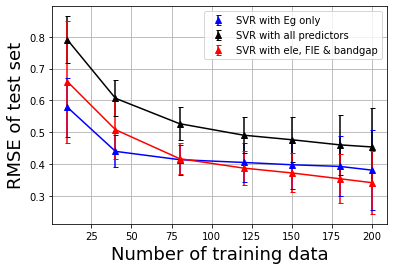

In [ ]:
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')


ii     = []
avg33  = []
avg44  = []
avg55  = []

for i in [10, 40, 80, 120, 150, 180, 200]:
    RMSE33 = []
    RMSE44 = []
    RMSE55 = []
    for p in np.arange(0,501):
    
        size=(234-i)/234
        
        X_train3, X_test3, y_train3, y_test3 = train_test_split(X1, y, test_size =size)
        make_pipeline(StandardScaler(), svm.SVR(kernel='rbf'))
        pipe = Pipeline([('scaler', StandardScaler()), ('svr', svm.SVR(kernel='rbf'))])
        
        pipe.fit(X_train3, y_train3)
        
        prediction3 = pipe.predict(X_test3)
        mse3 = mean_squared_error(y_test3, prediction3)
        RMSE3 = math.sqrt(mse3)
        
        
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X2, y, test_size =size)
        make_pipeline(StandardScaler(), svm.SVR(kernel='rbf', C=100, gamma=0.1))
        pipe = Pipeline([('scaler', StandardScaler()), ('svr', svm.SVR(kernel='rbf', C=100, gamma=0.1))])
        
        pipe.fit(X_train4, y_train4)
        
        prediction4 = pipe.predict(X_test4)
        mse4 = mean_squared_error(y_test4, prediction4)
        RMSE4 = math.sqrt(mse4)
        
        
        X_train5, X_test5, y_train5, y_test5 = train_test_split(X3, y, test_size =size)
        make_pipeline(StandardScaler(), svm.SVR(kernel='rbf', C=100, gamma=0.1))
        pipe = Pipeline([('scaler', StandardScaler()), ('svr', svm.SVR(kernel='rbf', C=100, gamma=0.1))])
        
        pipe.fit(X_train5, y_train5)
        
        prediction5 = pipe.predict(X_test5)
        mse5 = mean_squared_error(y_test5, prediction5)
        RMSE5 = math.sqrt(mse5)
        
        RMSE33.append(RMSE3)
        RMSE44.append(RMSE4)
        RMSE55.append(RMSE5)

        s3 = statistics.pstdev(RMSE33)
        s4 = statistics.pstdev(RMSE44)
        s5 = statistics.pstdev(RMSE55)

        avg3 = mean(RMSE33)
        avg4 = mean(RMSE44)
        avg5 = mean(RMSE55)

    avg33.append(avg3)
    avg44.append(avg4)
    avg55.append(avg5)
    ii.append(i)
    
    
    c = plt.errorbar(i, avg3, fmt='^', color='blue',yerr=s3,
                capsize=2.5, ecolor='blue', label = 'SVR with Eg only')
        
    d = plt.errorbar(i, avg4, fmt='^', color='k',yerr=s4,
                capsize=2.5, ecolor='k', label = 'SVR with all predictors')
    
    e = plt.errorbar(i, avg5, fmt='^', color='red',yerr=s5,
                capsize=2.5, ecolor='red', label = 'SVR with ele, FIE & bandgap')
    

#####
   
plt.plot(ii, avg33, c='blue')
plt.plot(ii, avg44, c='k')
plt.plot(ii, avg55, c='red')
plt.xlabel('Number of training data',fontsize=18)
plt.ylabel('RMSE of test set', fontsize=18)
plt.legend(handles=[c, d, e], loc='best')
plt.grid()
plt.show()

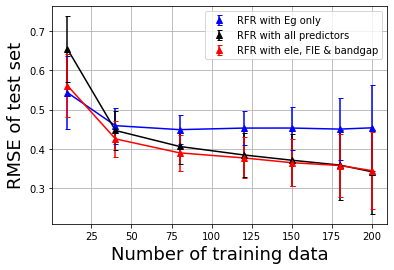

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


ii     = []
avg33  = []
avg44  = []
avg55  = []

for i in [10, 40, 80, 120, 150, 180, 200]:
    RMSE33 = []
    RMSE44 = []
    RMSE55 = []
    for p in np.arange(0,501):
    
        size=(234-i)/234
        
        X_train3, X_test3, y_train3, y_test3 = train_test_split(X1, y, test_size =size)
        make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=35))
        pipe = Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor(n_estimators=35))])
        
        pipe.fit(X_train3, y_train3)
        
        prediction3 = pipe.predict(X_test3)
        mse3 = mean_squared_error(y_test3, prediction3)
        RMSE3 = math.sqrt(mse3)
        
        
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X2, y, test_size =size)
        make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=35))
        pipe = Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor(n_estimators=35))])
        
        pipe.fit(X_train4, y_train4)
        
        prediction4 = pipe.predict(X_test4)
        mse4 = mean_squared_error(y_test4, prediction4)
        RMSE4 = math.sqrt(mse4)
        
        
        X_train5, X_test5, y_train5, y_test5 = train_test_split(X3, y, test_size =size)
        make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=35))
        pipe = Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor(n_estimators=35))])
        
        pipe.fit(X_train5, y_train5)
        
        prediction5 = pipe.predict(X_test5)
        mse5 = mean_squared_error(y_test5, prediction5)
        RMSE5 = math.sqrt(mse5)
        
        RMSE33.append(RMSE3)
        RMSE44.append(RMSE4)
        RMSE55.append(RMSE5)

        s3 = statistics.pstdev(RMSE33)
        s4 = statistics.pstdev(RMSE44)
        s5 = statistics.pstdev(RMSE55)

        avg3 = mean(RMSE33)
        avg4 = mean(RMSE44)
        avg5 = mean(RMSE55)

    avg33.append(avg3)
    avg44.append(avg4)
    avg55.append(avg5)
    ii.append(i)
    
    
    c = plt.errorbar(i, avg3, fmt='^', color='blue',yerr=s3,
                capsize=2.5, ecolor='blue', label = 'RFR with Eg only')
        
    d = plt.errorbar(i, avg4, fmt='^', color='k',yerr=s4,
                capsize=2.5, ecolor='k', label = 'RFR with all predictors')
    
    e = plt.errorbar(i, avg5, fmt='^', color='red',yerr=s5,
                capsize=2.5, ecolor='red', label = 'RFR with ele, FIE & bandgap')
    

#####
   
plt.plot(ii, avg33, c='blue')
plt.plot(ii, avg44, c='k')
plt.plot(ii, avg55, c='red')
plt.xlabel('Number of training data',fontsize=18)
plt.ylabel('RMSE of test set', fontsize=18)
plt.legend(handles=[c, d, e], loc='best')
plt.grid()
plt.show()

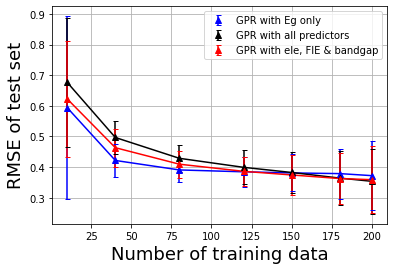

In [ ]:
import sklearn.gaussian_process as gp
import warnings
warnings.filterwarnings('ignore')

kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3)) 

ii     = []
avg33  = []
avg44  = []
avg55  = []

for i in [10, 40, 80, 120, 150, 180, 200]:
    RMSE33 = []
    RMSE44 = []
    RMSE55 = []
    for p in np.arange(0,501):
    
        size=(234-i)/234
        
        X_train3, X_test3, y_train3, y_test3 = train_test_split(X1, y, test_size =size)
        make_pipeline(StandardScaler(), gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.1))
        pipe = Pipeline([('scaler', StandardScaler()), ('gpr', gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.1))])
        
        pipe.fit(X_train3, y_train3)
        
        prediction3 = pipe.predict(X_test3)
        mse3 = mean_squared_error(y_test3, prediction3)
        RMSE3 = math.sqrt(mse3)
        
        
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X2, y, test_size =size)
        make_pipeline(StandardScaler(), gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.1))
        pipe = Pipeline([('scaler', StandardScaler()), ('gpr', gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.1))])
        
        pipe.fit(X_train4, y_train4)
        
        prediction4 = pipe.predict(X_test4)
        mse4 = mean_squared_error(y_test4, prediction4)
        RMSE4 = math.sqrt(mse4)
        
        
        X_train5, X_test5, y_train5, y_test5 = train_test_split(X3, y, test_size =size)
        make_pipeline(StandardScaler(), gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.1))
        pipe = Pipeline([('scaler', StandardScaler()), ('gpr', gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.1))])
        
        pipe.fit(X_train5, y_train5)
        
        prediction5 = pipe.predict(X_test5)
        mse5 = mean_squared_error(y_test5, prediction5)
        RMSE5 = math.sqrt(mse5)
        
        RMSE33.append(RMSE3)
        RMSE44.append(RMSE4)
        RMSE55.append(RMSE5)

        s3 = statistics.pstdev(RMSE33)
        s4 = statistics.pstdev(RMSE44)
        s5 = statistics.pstdev(RMSE55)

        avg3 = mean(RMSE33)
        avg4 = mean(RMSE44)
        avg5 = mean(RMSE55)

    avg33.append(avg3)
    avg44.append(avg4)
    avg55.append(avg5)
    ii.append(i)
    
    
    c = plt.errorbar(i, avg3, fmt='^', color='blue',yerr=s3,
                capsize=2.5, ecolor='blue', label = 'GPR with Eg only')
        
    d = plt.errorbar(i, avg4, fmt='^', color='k',yerr=s4,
                capsize=2.5, ecolor='k', label = 'GPR with all predictors')
    
    e = plt.errorbar(i, avg5, fmt='^', color='red',yerr=s5,
                capsize=2.5, ecolor='red', label = 'GPR with ele, FIE & bandgap')
    

#####
   
plt.plot(ii, avg33, c='blue')
plt.plot(ii, avg44, c='k')
plt.plot(ii, avg55, c='red')
plt.xlabel('Number of training data',fontsize=18)
plt.ylabel('RMSE of test set', fontsize=18)
plt.legend(handles=[c, d, e], loc='best')
plt.grid()
plt.show()